In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Nadam

from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.losses import Huber
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import l1_l2

from sklearn.metrics import (mean_squared_error,
                           r2_score,
                           mean_absolute_error,
                           explained_variance_score)

from tensorflow.keras.layers import (Dense, Dropout, BatchNormalization,
                                   Input, Concatenate, Reshape, Conv1D,
                                   MaxPooling1D, Flatten, MultiHeadAttention,
                                   LayerNormalization, GlobalAveragePooling1D,
                                   Embedding, Add, Attention)

from tensorflow.keras.callbacks import (EarlyStopping, ReduceLROnPlateau,
                                      ModelCheckpoint)

In [4]:
data = pd.read_excel('generated_data_and_train_dataset.xlsx')
df = pd.DataFrame(data)
df.head()

,Additive concentration,MAI,FAI,CsI,CsBr,MABr,MACl,PbI2,PbBr2,PbCl2,...,DMF,DMSO,GBL,Polarity index,Annealing tem,Etl,Htl,Back contact,Interlayer,PCE (%)
0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6.0,8.0,1.0,2.0,5.200
1,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6.0,8.0,1.0,2.0,4.828
2,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6.0,8.0,1.0,2.0,4.836
3,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6.0,8.0,1.0,2.0,5.070
4,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6.0,8.0,1.0,2.0,4.980


In [5]:
print(df.isnull().sum())

Additive concentration    0
MAI                       0
FAI                       0
CsI                       0
CsBr                      0
MABr                      0
MACl                      0
PbI2                      0
PbBr2                     0
PbCl2                     0
SnI2                      0
SnCl2                     0
SnBr2                     0
Pb(SCN)2                  0
SnF2                      0
DMF                       0
DMSO                      0
GBL                       0
Polarity index            0
Annealing tem             0
Etl                       0
Htl                       0
Back contact              0
Interlayer                0
PCE (%)                   0
dtype: int64


In [6]:
X_train = df.drop(['PCE (%)'], axis= 1)
y_train = df['PCE (%)']
print(X_train.shape, y_train.shape)

(5390, 24) (5390,)


In [7]:
test_data = pd.read_excel('151_test_data.xlsx')
test_df = pd.DataFrame(test_data)
test_df.head()

,Additive concentration,MAI,FAI,CsI,CsBr,MABr,MACl,PbI2,PbBr2,PbCl2,...,DMF,DMSO,GBL,Polarity index,Annealing tem,Etl,Htl,Back contact,Interlayer,PCE (%)
0,0,1.47,0.0,0.0,0.0,0.0,0.0,1.47,0.0,0.0,...,0.88,0.12,0.0,2.4,1.0,2,4,0,0,16.23
1,2,1.47,0.0,0.0,0.0,0.0,0.0,1.47,0.0,0.0,...,0.88,0.12,0.0,2.4,1.0,2,4,0,0,17.14
2,4,1.47,0.0,0.0,0.0,0.0,0.0,1.47,0.0,0.0,...,0.88,0.12,0.0,2.4,1.0,2,4,0,0,18.22
3,5,1.47,0.0,0.0,0.0,0.0,0.0,1.47,0.0,0.0,...,0.88,0.12,0.0,2.4,1.0,2,4,0,0,16.80
4,0,2.00,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.5,...,1.00,0.00,0.0,0.0,1.1,3,8,2,0,14.00


In [8]:
print(test_df.isnull().sum())

Additive concentration    0
MAI                       0
FAI                       0
CsI                       0
CsBr                      0
MABr                      0
MACl                      0
PbI2                      0
PbBr2                     0
PbCl2                     0
SnI2                      0
SnCl2                     0
SnBr2                     0
Pb(SCN)2                  0
SnF2                      0
DMF                       0
DMSO                      0
GBL                       0
Polarity index            0
Annealing tem             0
Etl                       0
Htl                       0
Back contact              0
Interlayer                0
PCE (%)                   0
dtype: int64


In [9]:
X_test = test_df.drop(['PCE (%)'], axis= 1)
y_test = test_df['PCE (%)']
print(X_test.shape, y_test.shape)

(151, 24) (151,)


In [10]:
np.random.seed(42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
def r_squared(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [12]:
def build_simple_nn():
    model = Sequential([
        Dense(64, activation='swish', input_shape=(X_train_scaled.shape[1],)),
        Dense(32, activation='swish'),
        Dense(1)
    ])
    model.compile(optimizer=Nadam(0.001), loss='mean_squared_error', metrics=['mae', r_squared])
    return model

In [13]:
def build_deep_nn():
    model = Sequential([
      Dense(192, activation='swish', kernel_initializer=HeNormal(), input_shape=(X_train_scaled.shape[1],)),
      BatchNormalization(),
      Dense(96, activation='swish', kernel_initializer=HeNormal()),
      BatchNormalization(),
      Dense(48, activation='swish', kernel_initializer=HeNormal()),
      BatchNormalization(),
      Dense(1)
  ])
    model.compile(optimizer=Adam(0.0005), loss='mean_squared_error', metrics=['mae', r_squared])
    return model

In [ ]:
def build_residual_nn():
    inputs = Input(shape=(X_train_scaled.shape[1],))
    x = Dense(256, activation='swish')(inputs)  
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)  
    # Residual block 1
    residual = x
    x = Dense(256)(x)  
    x = BatchNormalization()(x)
    x = Activation('swish')(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = Add()([x, residual])
    x = Activation('swish')(x)
    x = Dropout(0.1)(x)

    # Residual block 2 
    residual = Dense(128, use_bias=False)(x) if x.shape[-1] != 128 else x  
    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)
    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = Add()([x, residual])
    x = Activation('swish')(x)
    x = Dropout(0.1)(x)

    # Residual block 3 
    residual = Dense(64, use_bias=False)(x) if x.shape[-1] != 64 else x
    x = Dense(64)(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)
    x = Dense(64)(x)
    x = BatchNormalization()(x)
    x = Add()([x, residual])
    x = Activation('swish')(x)

    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(0.0001), loss='mean_squared_error', metrics=['mae', r_squared]) 
    return model

In [16]:
def build_1d_cnn():
    model = Sequential([
        Reshape((X_train_scaled.shape[1], 1), input_shape=(X_train_scaled.shape[1],)),
        Conv1D(64, 3, activation='swish', padding='same'),
        MaxPooling1D(2),
        BatchNormalization(),
        Conv1D(128, 3, activation='swish', padding='same'),
        GlobalAveragePooling1D(),
        Dense(64, activation='swish'),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer=Nadam(0.001), loss='mean_squared_error', metrics=['mae', r_squared])
    return model

In [17]:
def build_wide_deep():
    inputs = Input(shape=(X_train_scaled.shape[1],))

    # Wide Path
    wide = Dense(32, activation='linear')(inputs)

    # Deep Path
    deep = Dense(128, activation='swish')(inputs)
    deep = BatchNormalization()(deep)
    deep = Dropout(0.3)(deep)
    deep = Dense(64, activation='swish')(deep)

    # Concatenate
    merged = Concatenate()([wide, deep])
    outputs = Dense(1)(merged)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(0.0005), loss='mean_squared_error', metrics=['mae', r_squared])
    return model

In [18]:
def build_tab_transformer():
    inputs = Input(shape=(X_train_scaled.shape[1],))

    #Feature Projection
    x = Dense(256, activation='swish', kernel_initializer='he_normal')(inputs)
    x = LayerNormalization()(x)
    x = Dropout(0.2)(x)

    x = Reshape((16, 16))(x)

    #Transformer Encoder Blocks
    for _ in range(2):

        residual = x

        #Multi-Head Attention
        attn_output = MultiHeadAttention(
            num_heads=4,         
            key_dim=4,            
            dropout=0.1
        )(x, x)


        if residual.shape[-1] != attn_output.shape[-1]:
            residual = Dense(attn_output.shape[-1])(residual)


        x = LayerNormalization()(residual + attn_output)

        #Feed Forward Network
        ffn = Dense(64, activation='swish')(x)  
        ffn = Dropout(0.1)(ffn)
        ffn = Dense(16)(ffn)  

        x = LayerNormalization()(x + ffn)

    #Classification Head
    x = Flatten()(x)
    x = Dense(128, activation='swish')(x)
    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss=Huber(),
        metrics=['mae', r_squared]
    )
    return model



In [ ]:
def build_attention_nn():

    inputs = Input(shape=(X_train_scaled.shape[1],))

    
    x = Dense(512, activation='swish', kernel_initializer='he_normal')(inputs)
    x = LayerNormalization()(x)
    x = Dropout(0.4)(x)

    
    x = Reshape((16, 32))(x)  

    #Self-Attention with residual connection
    attn_output = MultiHeadAttention(
        num_heads=8,
        key_dim=16,
        dropout=0.3,
        kernel_regularizer=l1_l2(1e-5, 1e-4)
    )(x, x)
    x = LayerNormalization()(x + attn_output)

    
    x = Flatten()(x)
    x = Dense(256, activation='swish', kernel_initializer='he_normal')(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation='swish')(x)
    outputs = Dense(1)(x)

    
    optimizer = Nadam(learning_rate=0.00005, clipnorm=1.0)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=optimizer,
        loss=Huber(delta=1.0),  
        metrics=['mae', r_squared]
    )
    return model


In [20]:
#Classic_models

classic_models = {
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=10,
                                         min_samples_split=5, random_state=42),

    'XGBoost':   XGBRegressor(
                    objective='reg:squarederror',
                    n_estimators=100,
                    max_depth=6,
                    learning_rate=0.1,
                    random_state=42),

    'GBoost' :   GradientBoostingRegressor(
                  n_estimators=100,
                  max_depth=6,
                  learning_rate=0.1,
                  random_state=42),



    'DTree': DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42),
    'ETree': ExtraTreesRegressor(n_estimators=200, max_depth=10,
                                min_samples_split=5, random_state=42),
    'ABoost': AdaBoostRegressor(n_estimators=200, learning_rate=0.05, random_state=42),
    'SVM': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    

    
    'MLP': MLPRegressor(hidden_layer_sizes=(100,50), activation='relu',
                       solver='adam', alpha=0.0001, batch_size='auto',
                       learning_rate='constant', learning_rate_init=0.001,
                       max_iter=200, random_state=42)
}





In [21]:
#NN_models

nn_models = {
    'Simple NN': build_simple_nn(),
    'Deep NN': build_deep_nn(),
    'Residual NN': build_residual_nn(),
    'Attention NN': build_attention_nn(),
    '1D CNN': build_1d_cnn(),
    'Wide & Deep': build_wide_deep(),
    'tab-transformer': build_tab_transformer(),
}

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\reshape.py:38: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
results = {}

def get_callbacks(name):
    return [
        EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
        ModelCheckpoint(f'best_{name}.keras', save_best_only=True)
    ]


In [23]:
#Classic_training

for name, model in classic_models.items():

    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    train_metrics = {
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Train R2': r2_score(y_train, y_train_pred),
        'Train Explained Variance': explained_variance_score(y_train, y_train_pred)
    }

    y_test_pred = model.predict(X_test_scaled)
    test_metrics = {
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Test R2': r2_score(y_test, y_test_pred),
        'Test Explained Variance': explained_variance_score(y_test, y_test_pred)
    }

    results[name] = {**train_metrics, **test_metrics}


    print(f"\nModel: {name}")
    for metric, value in results[name].items():
        print(f"{metric}: {value:.4f}")


    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_test_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{name} - Actual vs Predicted')
    plt.tight_layout()
    plt.savefig(f'{name}_actual_vs_predicted.png')
    plt.close()


Model: Random Forest
Train RMSE: 0.9124
Train MAE: 0.6275
Train R2: 0.9730
Train Explained Variance: 0.9730
Test RMSE: 2.2631
Test MAE: 1.6580
Test R2: 0.8018
Test Explained Variance: 0.8190

Model: XGBoost
Train RMSE: 0.8009
Train MAE: 0.5318
Train R2: 0.9792
Train Explained Variance: 0.9792
Test RMSE: 1.7726
Test MAE: 1.3922
Test R2: 0.8784
Test Explained Variance: 0.8914

Model: GBoost
Train RMSE: 0.7599
Train MAE: 0.5157
Train R2: 0.9813
Train Explained Variance: 0.9813
Test RMSE: 1.9674
Test MAE: 1.5175
Test R2: 0.8502
Test Explained Variance: 0.8688

Model: DTree
Train RMSE: 1.0356
Train MAE: 0.6927
Train R2: 0.9652
Train Explained Variance: 0.9652
Test RMSE: 3.1593
Test MAE: 2.0995
Test R2: 0.6137
Test Explained Variance: 0.6380

Model: ETree
Train RMSE: 1.1497
Train MAE: 0.8090
Train R2: 0.9571
Train Explained Variance: 0.9571
Test RMSE: 1.8641
Test MAE: 1.3699
Test R2: 0.8655
Test Explained Variance: 0.8822

Model: ABoost
Train RMSE: 2.4265
Train MAE: 1.9247
Train R2: 0.8089


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
#NN_training

for name, model in nn_models.items():
    
    history = model.fit(
        X_train_scaled, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=get_callbacks(name),
        verbose=0
    )

    y_train_pred = model.predict(X_train_scaled).flatten()
    train_metrics = {
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Train R2': r2_score(y_train, y_train_pred),
        'Train Explained Variance': explained_variance_score(y_train, y_train_pred)
    }

    y_test_pred = model.predict(X_test_scaled).flatten()
    test_metrics = {
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Test R2': r2_score(y_test, y_test_pred),
        'Test Explained Variance': explained_variance_score(y_test, y_test_pred)
    }


    results[name] = {**train_metrics, **test_metrics}
    
    print(f"\nModel: {name}")
    for metric, value in results[name].items():
        print(f"{metric}: {value:.4f}")

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    ax1.plot(history.history['loss'], label='Train Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title(f'{name} - Learning Curve')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    ax2.plot(history.history['r_squared'], label='Train R²')
    ax2.plot(history.history['val_r_squared'], label='Validation R²')
    ax2.set_title(f'{name} - R² Score')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('R²')
    ax2.legend()

    sns.scatterplot(x=y_test, y=y_test_pred, ax=ax3)
    ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax3.set_xlabel('Actual Values')
    ax3.set_ylabel('Predicted Values')
    ax3.set_title(f'{name} - Actual vs Predicted')

    plt.tight_layout()
    plt.savefig(f'{name}_performance.png')
    plt.close()


169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Model: Simple NN
Train RMSE: 1.0708
Train MAE: 0.7295
Train R2: 0.9628
Train Explained Variance: 0.9628
Test RMSE: 2.5942
Test MAE: 1.9323
Test R2: 0.7395
Test Explained Variance: 0.7404
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Model: Deep NN
Train RMSE: 1.2081
Train MAE: 0.8545
Train R2: 0.9526
Train Explained Variance: 0.9527
Test RMSE: 2.0614
Test MAE: 1.6307
Test R2: 0.8355
Test Explained Variance: 0.8403
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Model: Residual NN
Train RMSE: 1.2421
Train MAE: 0.8529
Train R2: 0.9499
Train Explained Variance: 0.9533
Test RMSE: 1.9496
Test MAE: 1.6036
Test R2: 0.8529
Test Explained Variance: 0.8548
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Model: Attention NN
Train RMSE: 1.9618
Train MAE: 1.3854
Train R2: 0.8751
Train Explained Variance: 0.8866
Test RMSE

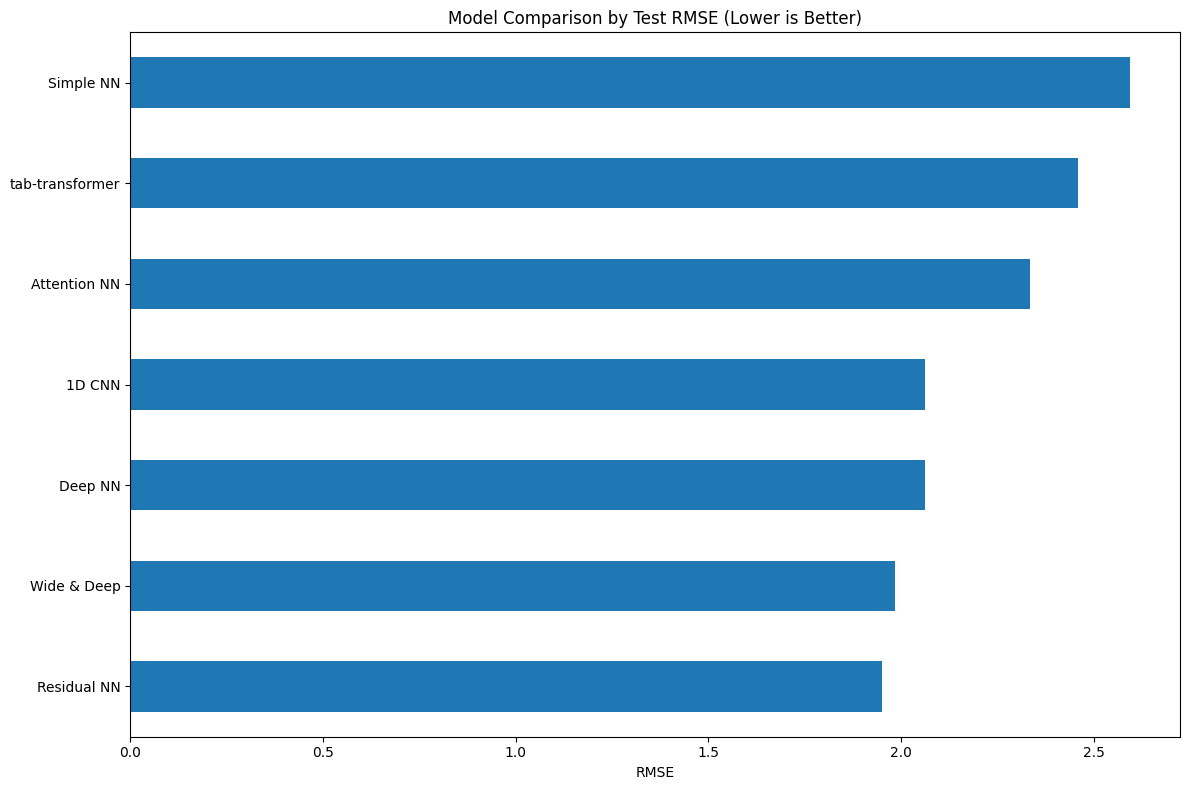

In [40]:
results_df = pd.DataFrame(results).T
results_df[['Test RMSE', 'Test R2', 'Test MAE']].sort_values(by='Test R2', ascending=False).head(7)

results_df = results_df.sort_values(by='Test RMSE')

plt.figure(figsize=(12, 8))
results_df['Test RMSE'].sort_values().plot(kind='barh')
plt.title('Model Comparison by Test RMSE (Lower is Better)')
plt.xlabel('RMSE')
plt.tight_layout()
plt.show()


In [39]:
print("\nTop Models by Test R2:")
results_df[['Test RMSE', 'Test R2', 'Test MAE']].sort_values(by='Test R2', ascending=False).head(7)



Top Models by Test R2:


,Test RMSE,Test R2,Test MAE
Residual NN,1.949594,0.852887,1.603586
Wide & Deep,1.985454,0.847426,1.566290
Deep NN,2.061441,0.835524,1.630666
1D CNN,2.062940,0.835284,1.661120
Attention NN,2.333621,0.789223,1.771679
tab-transformer,2.459946,0.765786,1.864481
Simple NN,2.594204,0.739523,1.932346
